## Covid-19 Drug Discovery
**Objectif : Prédire l'activité antivirale (pIC50) de molécules candidates contre le SARS-CoV-2 à partir de descripteurs moléculaires.**

### Import des modules

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import des data

In [139]:
data=pd.read_csv("/Users/mafaldafrere/Documents/Cours/IODAA/PROG/PROJET/covid19_drug_discovery/drug_data_with_properties.xls")
data.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


Premières observations : 
- On a des descripteurs sous forme de chaîne de caractère : par exemple pour la représentation SMILES de la molécule. Pour le moment je ne sais pas trop comment les gérer, on va probablement commencer par tester un modèle seulement avec des descripteurs numériques. 
- Valeurs BLINDED dans Target ? 

### 1. Exploration Préliminaire

On peut déjà drop CID car il s'agit juste de l'ID de la ligne : pas intéressant. 

In [140]:
data=data.drop(columns=["CID"])

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    104 non-null    object 
 1   MolecularFormula          104 non-null    object 
 2   MolecularWeight           104 non-null    float64
 3   InChI                     104 non-null    object 
 4   InChIKey                  101 non-null    object 
 5   IUPACName                 101 non-null    object 
 6   XLogP                     101 non-null    float64
 7   ExactMass                 101 non-null    float64
 8   MonoisotopicMass          101 non-null    float64
 9   TPSA                      101 non-null    float64
 10  Complexity                101 non-null    float64
 11  Charge                    101 non-null    float64
 12  HBondDonorCount           101 non-null    float64
 13  HBondAcceptorCount        101 non-null    float64
 14  RotatableB

Analyse NA :

In [142]:
# pourcentage de valeurs manquantes par colonne
na_counts = data.isna().sum()
na_percent = (na_counts / len(data)) * 100

# dataframe pr résumé
na_summary = pd.DataFrame({
    'Missing Count': na_counts,
    'Missing (%)': na_percent
})

# afficher que les colonnes avec au moins 1 NA
na_summary = na_summary[na_summary['Missing Count'] > 0].sort_values(by='Missing (%)', ascending=False)

# Affichage
display(na_summary)

,Missing Count,Missing (%)
FeatureAnionCount3D,4,3.846154
FeatureDonorCount3D,4,3.846154
YStericQuadrupole3D,4,3.846154
ZStericQuadrupole3D,4,3.846154
FeatureCationCount3D,4,3.846154
ConformerCount3D,4,3.846154
FeatureRingCount3D,4,3.846154
EffectiveRotorCount3D,4,3.846154
ConformerModelRMSD3D,4,3.846154
FeatureHydrophobeCount3D,4,3.846154


In [143]:
data.pIC50[data.pIC50=="BLINDED"].count()

np.int64(10)

On a 10 valeurs "BLINDED" dans la colonne target (pIC50): impossible de savoir de quoi il s'agit dans la documentation Kaggle, donc on va retirer ces lignes.

In [144]:
data=data[data["pIC50"]!="BLINDED"]
data.shape

data.pIC50=pd.to_numeric(data.pIC50)

On va drop les colonnes non-numériques :

In [145]:
cat_cols=data.select_dtypes(include='object').columns
data=data.drop(columns=cat_cols)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 103
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MolecularWeight           94 non-null     float64
 1   XLogP                     91 non-null     float64
 2   ExactMass                 91 non-null     float64
 3   MonoisotopicMass          91 non-null     float64
 4   TPSA                      91 non-null     float64
 5   Complexity                91 non-null     float64
 6   Charge                    91 non-null     float64
 7   HBondDonorCount           91 non-null     float64
 8   HBondAcceptorCount        91 non-null     float64
 9   RotatableBondCount        91 non-null     float64
 10  HeavyAtomCount            91 non-null     float64
 11  IsotopeAtomCount          91 non-null     float64
 12  AtomStereoCount           91 non-null     float64
 13  DefinedAtomStereoCount    91 non-null     float64
 14  UndefinedAtomSte

Après avoir rapidement regardé le dataset, on dirait qu'il y a des colonnes dont la valeur ne varie jamais, pour tous les individus :

In [146]:
for col in data.columns:
    if data[col].nunique() == 1:
        print(col, "est constante")

Charge est constante
IsotopeAtomCount est constante
DefinedAtomStereoCount est constante
UndefinedBondStereoCount est constante
CovalentUnitCount est constante


Effectivement, c'est le cas pour 5 colonnes! On les retire car elles n'apportent aucune information. => On évite la redondance et le bruit dans le modèle

In [147]:
data=data.drop(columns=["Charge","IsotopeAtomCount","DefinedAtomStereoCount","UndefinedBondStereoCount","CovalentUnitCount"])

### 2. Data Exploration

<Axes: xlabel='pIC50', ylabel='Count'>

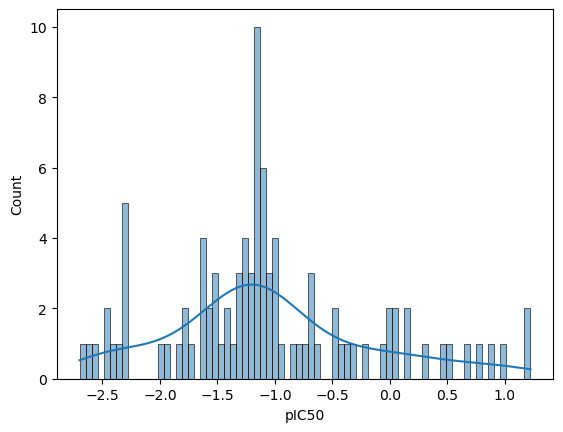

In [148]:
import seaborn as sns
sns.histplot(data.pIC50, bins=75, kde=True)

La distribution de la target est relativement normale. On n'observe pas de gros déséquilibres particuliers.

<Figure size 1000x800 with 0 Axes>

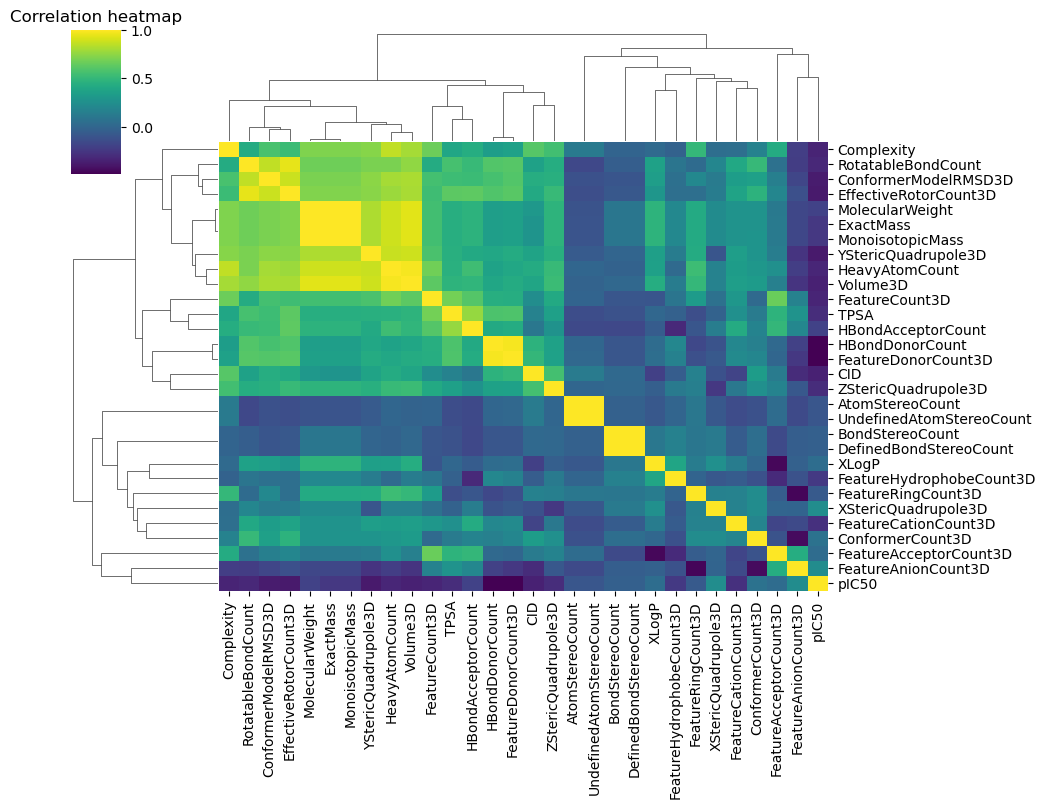

In [149]:
corr = data.corr()

plt.figure(figsize=(10,8))
#sns.heatmap(corr, cmap="viridis", annot=False) # sans cluster 
sns.clustermap(corr_filtered, cmap="viridis", figsize=(10,8)) # avec clusterisation
plt.title("Correlation heatmap")
plt.show()


On repère déjà que des variables sont anti-corrélées ou corrélées à la target, ce qui est déjà bon signe pour la suite (par exemple HBondDonorCount et FeatureDonorCount3D semblent importantes pour prédire l'outcome).

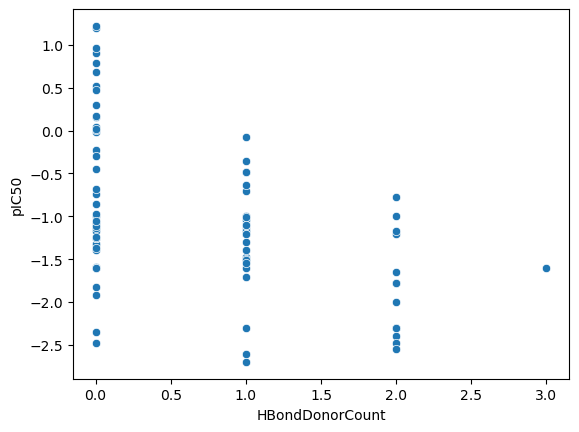

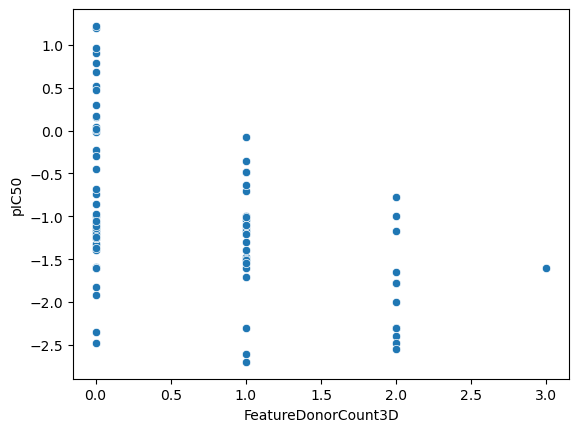

In [150]:
sns.scatterplot(data=data, x="HBondDonorCount", y="pIC50")
plt.show()

sns.scatterplot(data=data, x="FeatureDonorCount3D", y="pIC50")
plt.show()

Bon, il faut qu'on se penche + sur les distributions et les valeurs de chaque colonnes, car ici la corrélation est probablement faussée par le fait qu'il n'y a que 4 valeurs possibles pour pIC50 (même si il existe probablement quand même un lien faible pIC50 <=> High featuredonorcount3D par exemple)

**Focus distributions/valeurs par colonnes :**

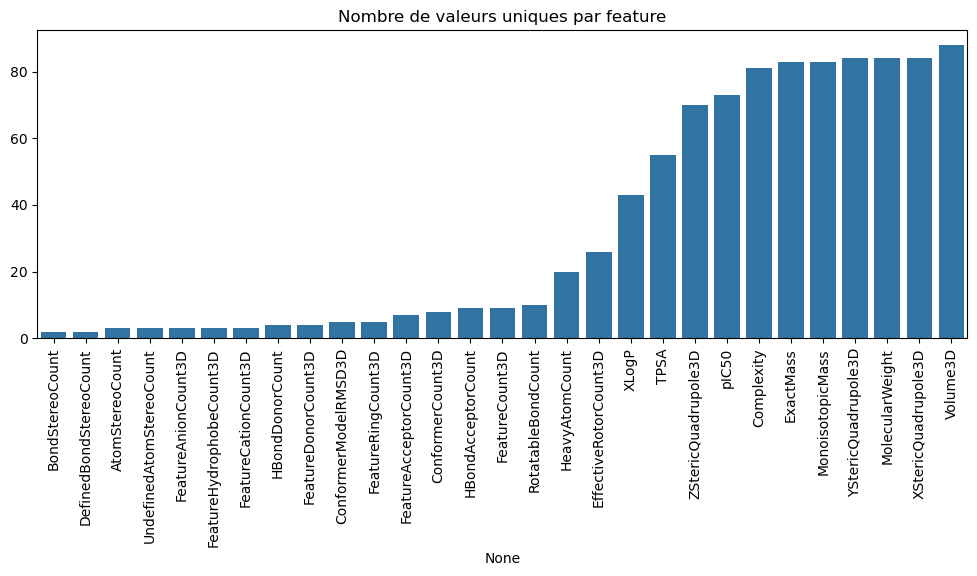

In [151]:
uniques = data.nunique().sort_values()
uniques

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.barplot(x=uniques.index, y=uniques.values)
plt.xticks(rotation=90)
plt.title("Nombre de valeurs uniques par feature")
plt.show()


On a les variables BondStereoCount et DefinedBondStereoCount qui n'ont que deux valeurs uniques ! 

<Axes: xlabel='BondStereoCount', ylabel='pIC50'>

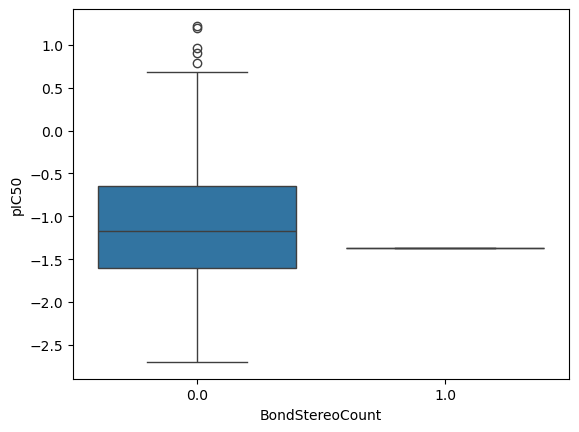

In [152]:
sns.boxplot(data=data, x="BondStereoCount", y="pIC50")

<Axes: xlabel='DefinedBondStereoCount', ylabel='pIC50'>

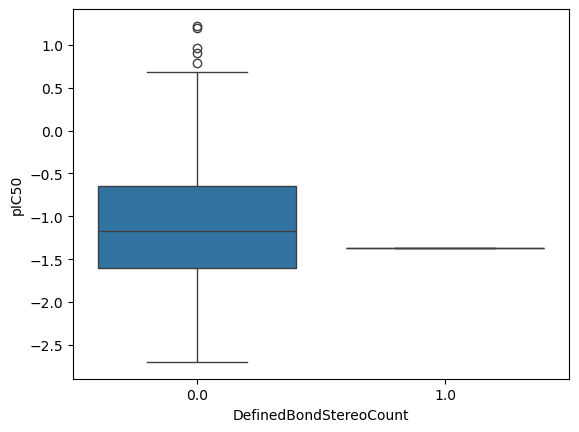

In [153]:
sns.boxplot(data=data, x="DefinedBondStereoCount", y="pIC50")

Ces deux colonnes sont quasiment constantes ! On les élimine car n'apportent pas d'information est risquent de rajouter du bruit au modèle. 

In [154]:
data=data.drop(columns=["DefinedBondStereoCount","BondStereoCount"])

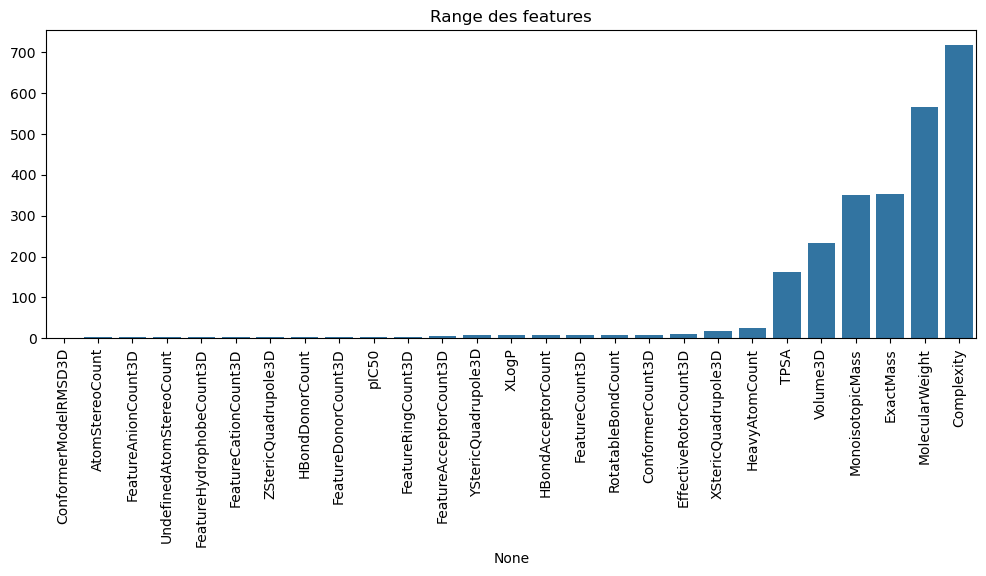

In [155]:
# echelle /range
ranges = (data.max() - data.min()).sort_values()
ranges

plt.figure(figsize=(12,4))
sns.barplot(x=ranges.index, y=ranges.values)
plt.xticks(rotation=90)
plt.title("Range des features")
plt.show()


Amplitudes très différentes => à scaler absolument!!!

In [156]:
def classify_feature(col):
    n = data[col].nunique()
    if n == 1:
        return "constant"
    elif n <= 5:
        return "discrete <=5 levels"
    elif n <= 15:
        return "moderately discrete"
    else:
        return "continuous"

categories = {col: classify_feature(col) for col in data.columns}
pd.Series(categories).value_counts()


continuous             13
discrete <=5 levels     9
moderately discrete     5
Name: count, dtype: int64

On utilise maintenant des techniques de visualisation (ici seulement visualisation, on ne les utilise pas pour l'entraînement), linéaires (PCA) et non linéaire (umap) pour observer des structures dans l'espace chimique de nos datas.

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# drop target
data_PCA = data.drop(columns=["pIC50"]).dropna() # je me permets de drop car peu de NA 

# Standardisation
scaled = StandardScaler().fit_transform(data_PCA)

# PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=data.loc[data_PCA.index,"pIC50"], cmap="viridis")
plt.colorbar(label="pIC50")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of molecule descriptors")
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>

/Users/mafaldafrere/miniforge3/envs/env_numpy/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


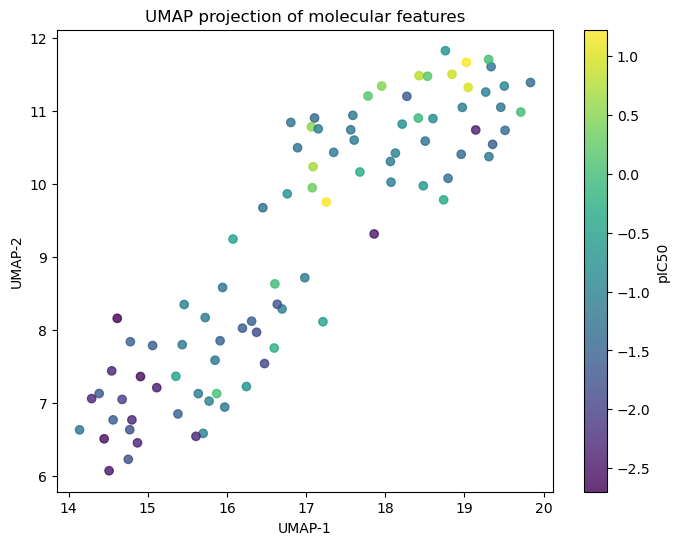

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Copy to avoid messing with original
df = data.copy()

df = df.dropna() # peu de NA donc on drop


# Target
y = df["pIC50"]
X = df.drop(columns=["pIC50"])

# Standardize
X = StandardScaler(with_mean=True).fit_transform(X)

# ---- UMAP ----
umap_model = umap.UMAP(
    n_neighbors=15,      # local structure
    min_dist=0.1,        # cluster tightness
    n_components=2,      # 2D
    metric='euclidean',  # can try 'cosine' if fingerprints later
    random_state=42
)

embedding = umap_model.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(embedding[:,0], embedding[:,1], c=y, cmap="viridis", alpha=0.8)
plt.colorbar(scatter, label="pIC50")
plt.title("UMAP projection of molecular features")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


La PCA est assez disséminée et complexe à analyser. La umap semble un peu plus structurée, avec deux amas de points : l'un dont le pIC50 est plus élevé (meilleur médicament potentiel), et l'autre où le pIC50 est plus faible. C'est assez prometteur pour la suite !
La umap étant plus structurée, on peut s'attendre à ce que des modèles non-linéaires performent mieux (RF, boosting).

<Axes: ylabel='None'>

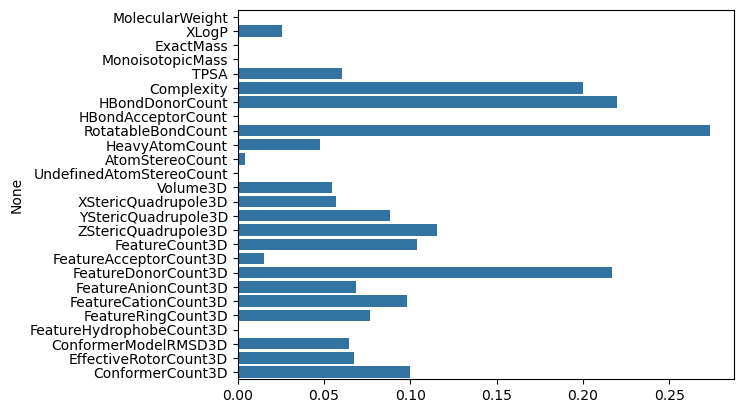

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(df.drop(columns=["pIC50"]), df["pIC50"])
sns.barplot(x=mi, y=df.drop(columns=["pIC50"]).columns)


### 3. Feature Engineering ? 

Le feature engineering a été guidé par des principes physico-chimiques.
J'ai ajouté :

- des variables binned (MW, XLogP, TPSA) pour capturer des effets seuils connus en pharmacologie (on bin des variables qui sont des gros drivers biochimiques connus, souvent utilisés pour déterminer si un médicament est efficace ou non),

- des ratios normalisant polarité, flexibilité et hydrophobicité par la taille moléculaire,

- un agrégat H-bond donors + acceptors.

Ces transformations améliorent la capacité du modèle à capturer des relations non linéaires tout en restant interprétables.

Une amélioration naturelle du modèle serait de générer des caractéristiques moléculaires plus riches, par exemple Morgan fingerprints via RDKit, permettant de capturer des patterns chimiques plus fins (anneaux aromatiques, substituants, voisins atomiques).
Pour le moment, nous nous concentrons sur les descripteurs tabulaires fournis.

### 4. Split Train / Test

On isole une partie du jeu de données qui ne sera jamais vu lors de l'entraînement / tuning des hyper-paramètres pour tester nos performances à la fin.

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=["pIC50"])
y=data.pIC50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 5. Comparaison de modèles
Sans tuning

ridge | CV RMSE = 0.8850 ± 0.1349
   rf | CV RMSE = 0.7818 ± 0.1352
  hgb | CV RMSE = 0.8596 ± 0.1347

Best (CV): rf with RMSE=0.7818

=== Hold-out test ===
RMSE: 0.6288
MAE : 0.4775
R^2 : -0.0455


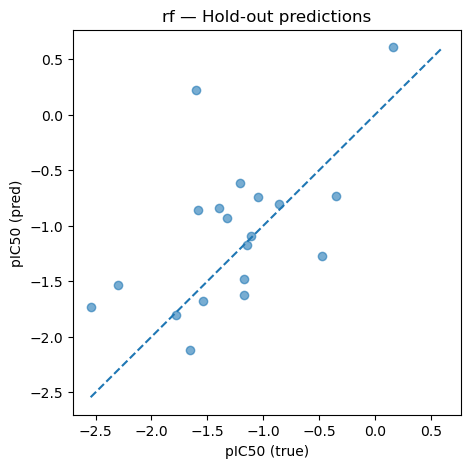

In [161]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

RNG = 42

from sklearn import set_config
set_config(transform_output="pandas")  # ✅ important pour que les nouvelles colonnes passent

# Feature engineering 
def fe(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    
    out["PolarDensity"] = out["TPSA"] / out["MolecularWeight"].replace(0, np.nan)
    out["Flexibility"] = out["RotatableBondCount"] / out["HeavyAtomCount"].replace(0, np.nan)
    out["HydrophobicFraction"] = out["FeatureHydrophobeCount3D"] / out["HeavyAtomCount"].replace(0, np.nan)
    out["HBondTotal"] = out["HBondDonorCount"] + out["HBondAcceptorCount"]
    
    out = out.replace([np.inf, -np.inf], np.nan)
    return out

fe_tr = FunctionTransformer(fe, validate=False)

# preprocess = imputer pour Na (pas très nombreux + scaling classique
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, selector(dtype_include=np.number)),  # sélectionne TOUT ce qui est numérique après FE
    ],
    remainder="drop"
)

# modèles 
models = {
    "ridge": Ridge() if "random_state" not in Ridge().get_params() else Ridge(random_state=RNG),
    "rf":    RandomForestRegressor(n_estimators=400, random_state=RNG, n_jobs=-1),
    "hgb":   HistGradientBoostingRegressor(random_state=RNG, max_iter=300)
}

# ---------- 4) Splits CV robustes pour régression ----------
def make_stratified_splits_for_regression(y, n_splits=5, max_bins=8, min_bins=3, random_state=RNG):
    """
    Tente une stratification par quantiles sur y (régression).
    Réduit le nb de bins jusqu'à ce que chaque bin ait >= n_splits échantillons.
    Fallback KFold si impossible.
    """
    y = pd.Series(y).reset_index(drop=True)
    for n_bins in range(max_bins, min_bins - 1, -1):
        try:
            bins = pd.qcut(y, q=n_bins, duplicates="drop")
        except Exception:
            continue
        counts = bins.value_counts()
        if counts.min() >= n_splits:
            labels = bins.astype(str)
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            return list(skf.split(np.zeros(len(labels)), labels))
    # Fallback
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return list(kf.split(np.zeros(len(y)), y))

splits = make_stratified_splits_for_regression(y_train, n_splits=5)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ---------- 5) Comparaison CV ----------
cv_results = []
best_name, best_pipe, best_score = None, None, np.inf

for name, est in models.items():
    pipe = Pipeline([
        ("fe", fe_tr),
        ("prep", preprocess),
        ("model", est),
    ])
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring="neg_root_mean_squared_error",
        cv=splits, n_jobs=-1
    )
    mean_rmse = -scores.mean()
    std_rmse  =  scores.std()
    cv_results.append((name, mean_rmse, std_rmse))
    print(f"{name:>5} | CV RMSE = {mean_rmse:.4f} ± {std_rmse:.4f}")
    if mean_rmse < best_score:
        best_score = mean_rmse
        best_name  = name
        best_pipe  = pipe

print(f"\nBest (CV): {best_name} with RMSE={best_score:.4f}")

# ---------- 6) Fit final + évaluation hold-out ----------
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print("\n=== Hold-out test ===")
print(f"RMSE: {rmse(y_test, y_pred):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R^2 : {r2_score(y_test, y_pred):.4f}")

# (Optionnel) Scatter y_true vs y_pred pour le rapport
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("pIC50 (true)")
plt.ylabel("pIC50 (pred)")
plt.title(f"{best_name} — Hold-out predictions")
plt.show()


Meilleur modèle = RF (on s'y attendait, non linéaire) mais rmse quand même très haute... On va essayer d'améliorer ça en rajoutant des features issu de RDkit. Le R^2 est pas terrible mais visuellement ça va ? 

In [172]:
data_augmented=pd.read_csv("/Users/mafaldafrere/Documents/Cours/IODAA/PROG/PROJET/covid19_drug_discovery/drug_data_with_properties.xls")
data_augmented=data_augmented.drop(columns=["CID"])
data_augmented=data_augmented[data_augmented["pIC50"]!="BLINDED"]
data_augmented.pIC50=pd.to_numeric(data_augmented.pIC50)
data_augmented=data_augmented.drop(columns=['MolecularFormula', 'InChI', 'InChIKey', 'IUPACName']) # sup catcols sauf SMILES
data_augmented=data_augmented.drop(columns=["Charge","IsotopeAtomCount","DefinedAtomStereoCount","UndefinedBondStereoCount","CovalentUnitCount"])
data_augmented=data_augmented.drop(columns=["DefinedBondStereoCount","BondStereoCount"])

data_augmented.shape

(94, 28)

In [176]:
from sklearn.model_selection import train_test_split

X=data_augmented.drop(columns=["pIC50"])
y=data_augmented.pIC50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerator
[16:05:28] DEPRECATION WARNING: please use MorganGenerat

ridge | CV RMSE = 0.6665 ± 0.0419


[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] DEPRECATION WARNING: please use MorganGenerator
[16:05:36] [16:05:36] DEPRECATION WARNING: please use MorganGenerator
DEPRECATION WARNING: please use MorganGenerat

   rf | CV RMSE = 0.6208 ± 0.0647


[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerator
[16:05:38] DEPRECATION WARNING: please use MorganGenerat

  hgb | CV RMSE = 0.6661 ± 0.0776

Best (CV): rf with RMSE=0.6208


[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerator
[16:05:39] DEPRECATION WARNING: please use MorganGenerat


=== Hold-out test ===
RMSE: 0.4158
MAE : 0.3552
R^2 : 0.5428


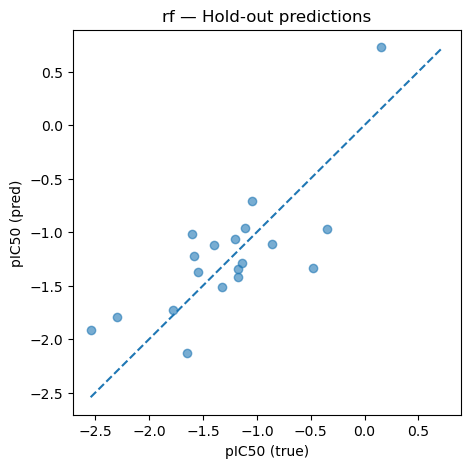

In [177]:

# Add Morgan fingerprints 

from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# --- Morgan fingerprint function ---
def smiles_to_morgan_fp(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(n_bits)
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))

# --- sklearn transformer wrapper ---
from sklearn.base import BaseEstimator, TransformerMixin

class MorganFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, radius=2, n_bits=1024):
        self.radius = radius
        self.n_bits = n_bits

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        smiles = X["SMILES"]
        fps = np.array([smiles_to_morgan_fp(s, self.radius, self.n_bits) for s in smiles])
        # return pandas DataFrame so names propagate
        return pd.DataFrame(fps, index=X.index)

# -------------------------------
# Your original code continues
# -------------------------------
from sklearn import set_config
set_config(transform_output="pandas")

# Feature engineering 
def fe(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()    
    out["PolarDensity"] = out["TPSA"] / out["MolecularWeight"].replace(0, np.nan)
    out["Flexibility"] = out["RotatableBondCount"] / out["HeavyAtomCount"].replace(0, np.nan)
    out["HydrophobicFraction"] = out["FeatureHydrophobeCount3D"] / out["HeavyAtomCount"].replace(0, np.nan)
    out["HBondTotal"] = out["HBondDonorCount"] + out["HBondAcceptorCount"]
    out = out.replace([np.inf, -np.inf], np.nan)
    return out

fe_tr = FunctionTransformer(fe, validate=False)

# --- split numeric vs SMILES ---
num_cols = [c for c in X_train.columns if c != "SMILES"]

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("morgan", MorganFeaturizer(radius=2, n_bits=1024), ["SMILES"])
    ],
    remainder="drop"
)

# models (unchanged)
models = {
    "ridge": Ridge() if "random_state" not in Ridge().get_params() else Ridge(random_state=RNG),
    "rf":    RandomForestRegressor(n_estimators=400, random_state=RNG, n_jobs=-1),
    "hgb":   HistGradientBoostingRegressor(random_state=RNG, max_iter=300)
}

# strat CV fn (unchanged)
def make_stratified_splits_for_regression(y, n_splits=5, max_bins=8, min_bins=3, random_state=RNG):
    y = pd.Series(y).reset_index(drop=True)
    for n_bins in range(max_bins, min_bins - 1, -1):
        try:
            bins = pd.qcut(y, q=n_bins, duplicates="drop")
        except Exception:
            continue
        if bins.value_counts().min() >= n_splits:
            labels = bins.astype(str)
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            return list(skf.split(np.zeros(len(labels)), labels))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return list(kf.split(np.zeros(len(y)), y))

splits = make_stratified_splits_for_regression(y_train, n_splits=5)
def rmse(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))

# ---- CV loop (unchanged) ----
cv_results = []
best_name, best_pipe, best_score = None, None, np.inf

for name, est in models.items():
    pipe = Pipeline([
        ("fe", fe_tr),
        ("prep", preprocess),
        ("model", est),
    ])
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring="neg_root_mean_squared_error",
        cv=splits, n_jobs=-1
    )
    mean_rmse = -scores.mean()
    std_rmse  =  scores.std()
    print(f"{name:>5} | CV RMSE = {mean_rmse:.4f} ± {std_rmse:.4f}")
    if mean_rmse < best_score:
        best_score = mean_rmse
        best_name  = name
        best_pipe  = pipe

print(f"\nBest (CV): {best_name} with RMSE={best_score:.4f}")

# ---- Fit + test ----
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print("\n=== Hold-out test ===")
print(f"RMSE: {rmse(y_test, y_pred):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R^2 : {r2_score(y_test, y_pred):.4f}")

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("pIC50 (true)")
plt.ylabel("pIC50 (pred)")
plt.title(f"{best_name} — Hold-out predictions")
plt.show()



Visuellement pas mal !! On a amélioré la RMSE ! sur le test on a de bons résultats.
Tout ça est à prendre avec des pincettes quand même car: on est sur de la chimie computationnelle, de plus gros modèles de deep seront évidemment meilleurs. On va maintenant essayer de tuner les hyperparamètres de RF pour voir jusqu'ou on peut pousser.

### 6. Tuning des Hyper-Paramètres sur un RF

In [179]:
# ===============================
# Optuna tuning léger pour RandomForest (+ Morgan FP propre)
# ===============================
import numpy as np
import pandas as pd
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config

# --- RDKit: MorganGenerator (plus de warnings) ---
from rdkit import Chem, RDLogger
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import DataStructs

RDLogger.DisableLog('rdApp.*')  # coupe le bruit RDKit

RNG = 42
set_config(transform_output="pandas")

# ---------- FE (inchangé, robustifié) ----------
def fe(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if {"TPSA","MolecularWeight"}.issubset(out.columns):
        out["PolarDensity"] = out["TPSA"] / out["MolecularWeight"].replace(0, np.nan)
    if {"RotatableBondCount","HeavyAtomCount"}.issubset(out.columns):
        out["Flexibility"] = out["RotatableBondCount"] / out["HeavyAtomCount"].replace(0, np.nan)
    if {"FeatureHydrophobeCount3D","HeavyAtomCount"}.issubset(out.columns):
        out["HydrophobicFraction"] = out["FeatureHydrophobeCount3D"] / out["HeavyAtomCount"].replace(0, np.nan)
    if {"HBondDonorCount","HBondAcceptorCount"}.issubset(out.columns):
        out["HBondTotal"] = out["HBondDonorCount"] + out["HBondAcceptorCount"]
    out = out.replace([np.inf, -np.inf], np.nan)
    return out

fe_tr = FunctionTransformer(fe, validate=False)

# ---------- Morgan Featurizer (nouvelle API) ----------
from sklearn.base import BaseEstimator, TransformerMixin

class MorganFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, radius=2, n_bits=1024):
        self.radius = radius
        self.n_bits = n_bits
        self._gen = GetMorganGenerator(radius=self.radius, fpSize=self.n_bits)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        smiles = X.iloc[:, 0].astype(str)
        fps = []
        arr = np.zeros((self.n_bits,), dtype=np.uint8)
        for s in smiles:
            mol = Chem.MolFromSmiles(s)
            if mol is None:
                fps.append(np.zeros(self.n_bits, dtype=np.uint8))
            else:
                fp = self._gen.GetFingerprint(mol)
                DataStructs.ConvertToNumpyArray(fp, arr)
                fps.append(arr.copy())
        cols = [f"mfp_{i}" for i in range(self.n_bits)]
        return pd.DataFrame(np.vstack(fps), index=X.index, columns=cols)

# ---------- Préprocess dynamique ----------
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])

has_smiles = "SMILES" in X_train.columns

transformers = [
    ("num", num_pipe, selector(dtype_include=np.number)),
]
if has_smiles:
    transformers.append(("morgan", MorganFeaturizer(radius=2, n_bits=1024), ["SMILES"]))

preprocess = ColumnTransformer(transformers=transformers, remainder="drop")

# ---------- Splits CV “stratifiés” régression ----------
def make_stratified_splits_for_regression(y, n_splits=5, max_bins=8, min_bins=3, random_state=RNG):
    y = pd.Series(y).reset_index(drop=True)
    for n_bins in range(max_bins, min_bins - 1, -1):
        try:
            bins = pd.qcut(y, q=n_bins, duplicates="drop")
        except Exception:
            continue
        if bins.value_counts().min() >= n_splits:
            labels = bins.astype(str)
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            return list(skf.split(np.zeros(len(labels)), labels))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return list(kf.split(np.zeros(len(y)), y))

splits = make_stratified_splits_for_regression(y_train, n_splits=5)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ---------- Objective Optuna (léger & prunable) ----------
def build_pipeline(params):
    rf = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        max_features=params["max_features"],
        bootstrap=params["bootstrap"],
        random_state=RNG,
        n_jobs=-1,
    )
    return Pipeline([
        ("fe", fe_tr),
        ("prep", preprocess),
        ("model", rf),
    ])

def objective(trial: optuna.Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800, step=100),
        "max_depth": trial.suggest_int("max_depth", 6, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.3, 0.5, 0.7, 1.0]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }
    pipe = build_pipeline(params)

    # CV RMSE (négatif pour maximiser → on renvoie la perte positive)
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring="neg_root_mean_squared_error",
        cv=splits, n_jobs=1
    )
    rmse_cv = -scores.mean()

    # pruning
    trial.report(rmse_cv, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return rmse_cv

study = optuna.create_study(
    direction="minimize",
    sampler=TPESampler(seed=RNG),
    pruner=MedianPruner(n_warmup_steps=5),
)

# tuning léger : soit n_trials=30, soit timeout=300s (au choix)
study.optimize(objective, n_trials=30, show_progress_bar=False)

print("Best CV RMSE:", study.best_value)
print("Best params:", study.best_params)

# ---------- Refit sur train complet + évaluation hold-out ----------
best_pipe = build_pipeline(study.best_params)
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print("\n=== Hold-out (tuned RF) ===")
print(f"RMSE: {rmse(y_test, y_pred):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R^2 : {r2_score(y_test, y_pred):.4f}")


[I 2025-11-01 16:19:57,420] A new study created in memory with name: no-name-98d79643-9af2-48b7-b8ba-2220a8a23288
[I 2025-11-01 16:19:59,438] Trial 0 finished with value: 0.6568925112651175 and parameters: {'n_estimators': 400, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 0.5, 'bootstrap': False}. Best is trial 0 with value: 0.6568925112651175.
[I 2025-11-01 16:20:03,102] Trial 1 finished with value: 0.696777285587156 and parameters: {'n_estimators': 700, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7, 'bootstrap': False}. Best is trial 0 with value: 0.6568925112651175.
[I 2025-11-01 16:20:05,930] Trial 2 finished with value: 0.642131084833087 and parameters: {'n_estimators': 500, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 2 with value: 0.642131084833087.
[I 2025-11-01 16:20:07,644] Trial 3 finished with value: 0.6724523971843747 and parame

Best CV RMSE: 0.5862492381309805
Best params: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}

=== Hold-out (tuned RF) ===
RMSE: 0.4256
MAE : 0.3498
R^2 : 0.5209


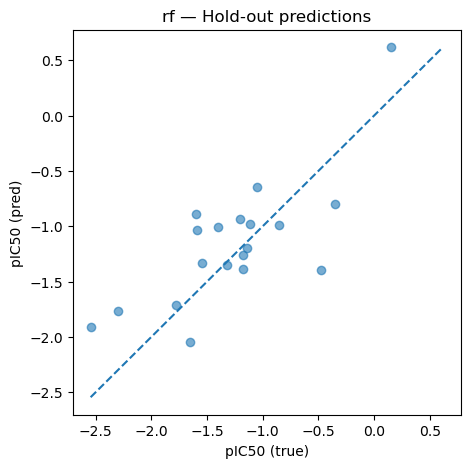

In [180]:

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("pIC50 (true)")
plt.ylabel("pIC50 (pred)")
plt.title(f"{best_name} — Hold-out predictions")
plt.show()

Depuis le premier entraînement, on a amélioré la RMSE de 0.7818 à 0.58 en train ! Et 0.4256 en test. Ca reste élevé mais il faudrait utiliser des méthodes plus avancées pour améliorer les performances. 

### 7. Interprétation

In [ ]:
rf = best_pipe.named_steps["model"]

importances = rf.feature_importances_
feat_names = best_pipe.named_steps["prep"].get_feature_names_out()

idx = importances.argsort()[-15:][::-1]  # top 15
for i in idx:
    print(feat_names[i], importances[i])


AttributeError: Transformer morgan (type MorganFeaturizer) does not provide get_feature_names_out.